In [20]:
from roots import *
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

In [26]:
test_cases = [
    (('D', 8, np.array([2, 1, 1.1, 3, 0.9, 1.9, 4, 2.1])), 
     [('A', 3), ('D', 4)]),
    (('F', 4, np.array([4, 5, 3/2, 1/2])),
     [('C', 4)]),
    (('F', 4, np.array([7/4, 1/4, 5/4, -3/4])),
     [('B', 3), ('A', 1)]),
    (('E', 6, np.array([1, 2, 1, 4, 4.5, 0.5, 0.5, -0.5])),
     [('D', 5)]),
    (('E', 7, np.array([1/4, 1/4, 1/4, 1/4, 1/4, -3/4, -1, 1])),
     [('A', 7)]),
    (('E', 8, np.array([1, 5, 9, 13, 9, 1, 5, 9])/4),
     [('D', 8)]),
    (('E', 8, np.array([1/2, -3/2, -3, -2, -1, -4, -5, -19])),
     [('E', 7), ('A', 1)]),
    (('E', 7, np.array([1, 3, 5, -7, -9, -11, -1/2, 1/2])),
     [('D', 6), ('A', 1)]),
    (('E', 8, np.array([1, 1, 1, 1, 1, 1, 1/2, 5/2])),
     [('E', 7), ('A', 1)])
]

def decomposition_test() -> None:
    for test_case in test_cases:
        typ, rank, weight = test_case[0]
        # print(typ, rank, weight)
        rt, _ = integral_root_system(typ, rank, weight)
        prts, _ = root_system_decomposition(rt)
        result = []
        for prt in prts:
            srt, _ = simple_roots_of_positive_roots(prt)
            result.append(cartan_type(prt, srt))
        assert result == test_case[1]
    print("All test passed!")

typ, rank, weight = test_cases[3][0]
# print(typ, rank, weight)
rt, _ = integral_root_system(typ, rank, weight)
prts, _ = root_system_decomposition(rt)
result = []
for prt in prts:
    srt, _ = simple_roots_of_positive_roots(prt)
    result.append(cartan_type(prt, srt))
    print(srt)

[[ 0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5]
 [ 1.   1.   0.   0.   0.   0.   0.   0. ]
 [-1.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   1.   0.   0.   0.   0. ]]


In [22]:
typ, rank, weight = test_cases[3][0]

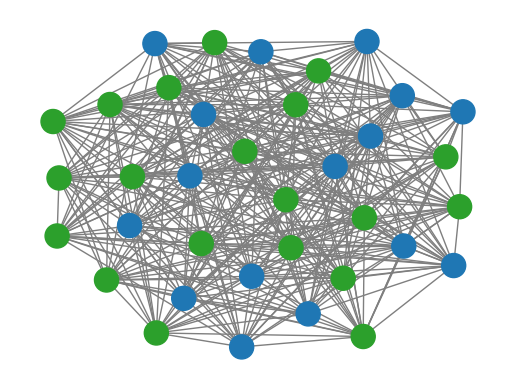

In [23]:
simple_roots, roots = root_system(typ, rank)
positive_roots = roots[:len(roots) // 2]
mat = np.abs(positive_roots @ positive_roots.T) > 1e-7
for i in range(mat.shape[0]):
    mat[i, i] = 0
integral_roots, integral_roots_ind = integral_root_system(typ, rank, weight)
integral_positive_roots, integral_positive_roots_ind = integral_roots[:len(integral_roots) // 2], integral_roots_ind[:len(integral_roots) // 2]

basic_root_graph = nx.from_numpy_array(mat)

pos = nx.nx_agraph.graphviz_layout(basic_root_graph, prog='circo')
fig, ax = plt.subplots()
simple_roots_colormap = ['tab:orange'] * rank + ['tab:blue'] * (len(basic_root_graph) - rank)


integral_roots_colormap = ['tab:blue'] * len(basic_root_graph)
for ind in np.nditer(integral_positive_roots_ind):
    integral_roots_colormap[ind] = 'tab:green'

nx.draw(
    basic_root_graph,
    # node_color=simple_roots_colormap,
    node_color=integral_roots_colormap,
    edge_color='tab:grey',
    )




[20]

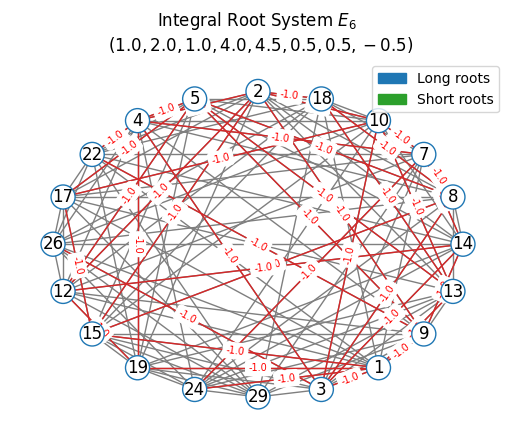

In [24]:

rt, rt_ind = integral_root_system(typ, rank, weight)
prts, _ = root_system_decomposition(rt)
for prt in prts:
    srt, _ = simple_roots_of_positive_roots(prt)

cmat = rt @ rt.T
mat = np.abs(rt @ rt.T) > 1e-7

for i in range(mat.shape[0]):
    mat[i, i] = 0
half_num = int(np.round(mat.shape[0]/2))
root_graph = nx.from_numpy_array(mat[:half_num, :half_num])
decomposed = [root_graph.subgraph(c).copy() for c in nx.connected_components(root_graph)]
# pos = nx.spring_layout(root_graph, k=5)
pos = nx.nx_agraph.graphviz_layout(root_graph, prog='circo')
fig, ax = plt.subplots()

color_map = []
size_map = []
for node in root_graph:
    if np.linalg.norm(rt[node]) > 1.1:
        color_map.append('tab:blue')
    else: 
        color_map.append('tab:green')

nx.draw(root_graph, 
        pos=pos,
        with_labels=True,
        ax=ax,
        node_color='white',
        edge_color='tab:grey',
        edgecolors=color_map,
        labels={i: f'{rt_ind[i]+1}' for i in range(half_num)},
        )

edge_labels = {(u, v): f'{cmat[u][v]}' for u, v in root_graph.edges if np.abs(cmat[u][v] + 1) < 1e-7}

nx.draw_networkx_edges(
    root_graph, pos,
    edgelist=[(u, v) for u, v in root_graph.edges if cmat[u][v] < 0],
    edge_color='tab:red'
)

nx.draw_networkx_edge_labels(
    root_graph, pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=7
)
# Create legend
blue_patch = mpatches.Patch(color='tab:blue', label='Long roots')
green_patch = mpatches.Patch(color='tab:green', label='Short roots')
ax.legend(handles=[blue_patch, green_patch])
ax.title.set_text(f'Integral Root System ${typ}_{str(rank)}$ \n $({", ".join(map(str, weight.tolist()))})$')

[len(g) for g in nx.connected_components(root_graph)]